In [5]:
# Exercise 1
import requests
from bs4 import BeautifulSoup

url = "https://movie.douban.com/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/118.0 Safari/537.36"
}
res = requests.get(url, headers=headers)

# 访问状态、文本类型、内容
print(res.status_code)
print(type(res.text))
print(res.text[:500])

#获取电影图片并保存
soup = BeautifulSoup(res.text, "html.parser")
img_tag = soup.find("img")
img_url = img_tag["src"]
img_data = requests.get(img_url, headers=headers).content

with open("movie_poster.jpg", "wb") as f:
    f.write(img_data)

200
<class 'str'>
<!DOCTYPE html>
<html lang="zh-CN" class="ua-windows ua-webkit">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <title>
        豆瓣电影
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta


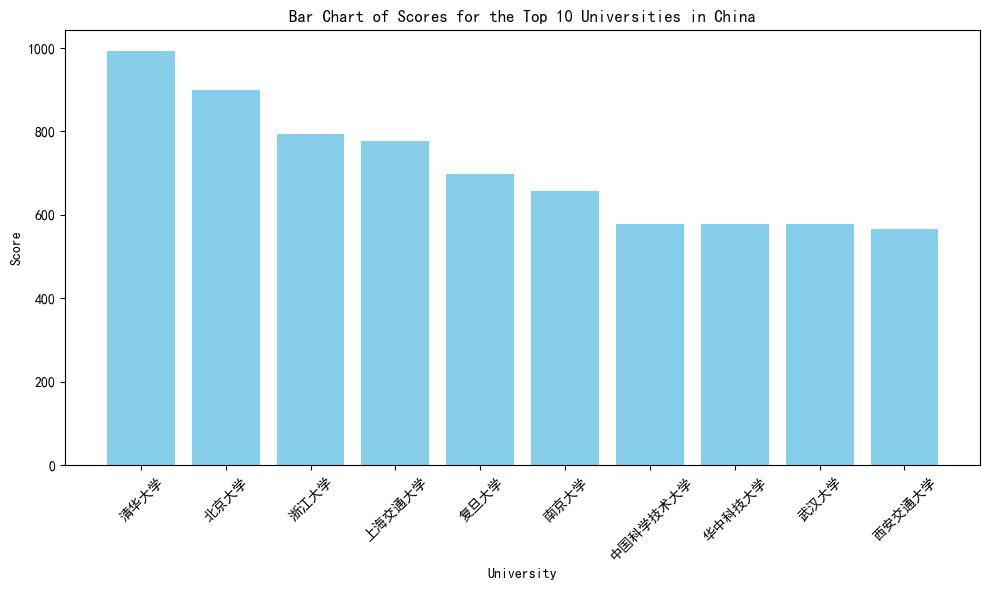

In [4]:
# Exercise 2
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# 获取数据
url = "https://www.eol.cn/e_html/gk/dxpm/index.shtml"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/118.0 Safari/537.36"
}
res = requests.get(url, headers=headers)
res.encoding = 'utf-8'

soup = BeautifulSoup(res.text, "html.parser")
rows = soup.find_all("tr")


data = []
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) >= 3:
        rank = cols[0].text.strip()
        school = cols[1].text.strip()
        score = cols[2].text.strip()
        data.append([rank, school, score])

df = pd.DataFrame(data, columns=["Rank", "University", "Score"])
df.to_excel("university_rank.xlsx", index=False)

# 画图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

top10 = df.head(10)
plt.figure(figsize=(10,6))
plt.bar(top10["University"], top10["Score"].astype(float), color='skyblue')
plt.xlabel("University")
plt.ylabel("Score")
plt.title("Bar Chart of Scores for the Top 10 Universities in China")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()